
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset gathers information from 100,000 medical appointments in Brazil; the main focus is on the question of whether or not patients show up for their appointments. Below is a brief description of several characteristics which are considered for each patient.
- *Gender* specifies the gender of the patient.
- *ScheduledDay* tells us on what day the patient set up their appointment.
- *AppointmentDay* provides the day of the actual appointment. 
- *Age* specifies the age of the patient.
- *Neighbourhood* indicates the location of the hospital.
- *Scholarship* indicates whether the patient is enrolled in the Brazilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
- *Hipertension* states whether the patient suffers from hypertension.
- *Diabetes* states whether the patient suffers from diabetes.
- *Alcoholism* states whether the patient suffers from alcohol addiction.
- *Handcap* states whether the patient is handicapped.
- *SMS_received* the number of messages, if any, sent to the patient.
- *No-show* states whether or not the patient showed up for the appointment.
    - **No** if the patient showed up.
    - **Yes** if they did not.
    

### Question(s) for Analysis

1. **What factors can influence a patient's willingness to attend?**
2. **What percentage of patients have co-existing hypertension and diabetes? What percentage of those patients showed up?**
3. **Does being a member of the Brazilian welfare program influenced by age?**
4. **Does the time interval between the scheduling day and appointment day affect the patient's likelihood of showing up?**
5. **When it comes to appointments, how does the day of the week affect their number?**


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# After Running this line; restarting the kernel maybe necessary, so that the rest of the code can run smoothly.
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


As stated earlier, it's advised to restart the kernel before proceeding to avoid errors when running the code.

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, the dataset is loaded and its general properties are studied.

### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df= pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Identifying the number of columns and rows
df.shape

(110527, 14)

In [5]:
# Provide an overlook for the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Calculating the number od duplicates
df.duplicated().sum()

0

The dataset contains 110527 columns and 14 rows; it contains no missing values and no duplicates.

In [7]:
# Give a summary of the statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The values in the *Age* column contain negative value(s) since the value for the *min* is equal to -1. Rows with incorrect age value(s) can be replaced with the value of the *mean*. The *max* in the *Handcap* column is 4. The number of handicaps the patients have is considered irrelevant to the scope of this analysis. Therefore,  any value greater than 1 should be replaced by 1.


### Data Cleaning

#### To prepare this dataset for analysis a few measures can be taken

- The columns that won't be used for analysis such as PatientId and AppointmentID should be deleted.
- ScheduledDate and AppointmentDay should be converted to DateTime datatype.
- The incorrect age values should be replaced.
- The No-show column can be renamed and the values reassigned for better interpretation of the data.
- Setting values that are greater than 1 in the Handcap column to 1.
- Correcting the spelling of Hipertension column's name.
- A new cloumn with age groups can be created
 

In [8]:
# After discussing the structure of the data and any problems that need to be
# Cleaned, perform those cleaning steps in the second part of this section.

# Deleteing both PatientID and Appointment ID columns, as they are not going to be used in the anaylsis.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# checking that the specified columns were deleted
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# convert the ScheduledDay column to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# extract month from ScheduledDay to create a new column
df['Scheduled_month'] = df['ScheduledDay'].dt.month

# Convert months data from numbers to names 
df['Scheduled_month'] = df['Scheduled_month'].apply(lambda x: calendar.month_abbr[x])

# extract day from ScheduledDay to create a new column
df['Scheduled_day'] = df['ScheduledDay'].dt.weekday_name

# Checking that the new columns are added to the dataframe
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_month,Scheduled_day
0,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Apr,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Apr,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Apr,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Apr,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Apr,Friday


In [10]:
# convert the AppointmentDay column to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# extract month and day from AppointmentDay to create new columns
df['Appointment_month'] = df['AppointmentDay'].dt.month
df['Appointment_day'] = df['AppointmentDay'].dt.weekday_name

# Convert months data from numbers to names 
df['Appointment_month'] = df['Appointment_month'].apply(lambda x: calendar.month_abbr[x])

# Checking that the new columns are added to the dataframe
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_month,Scheduled_day,Appointment_month,Appointment_day
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Apr,Friday,Apr,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Apr,Friday,Apr,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Apr,Friday,Apr,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Apr,Friday,Apr,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Apr,Friday,Apr,Friday


In [11]:
# Number of rows with age value equal to or less than zero
df.query('Age <= 0').shape[0]

3540

In [12]:
# Repalcing the incorrect age values with the average age
average_age = df.Age.mean().astype(int)
df.loc[df["Age"] < 0, "Age"] = average_age

# Checking that the replacemnet took place 
df.query('Age < 0').shape[0]

0

In [13]:
# Renaming the No-show colum
df.rename(columns = {'No-show':'Showed_up'}, inplace=True)

In [14]:
# Reassigning the values of the Showed_up column
df['Showed_up']= np.where(df['Showed_up'] == 'No', 'Yes', 'No')

# Checking that the values got reassigned
df.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Scheduled_month,Scheduled_day,Appointment_month,Appointment_day
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,Apr,Friday,Apr,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,Apr,Friday,Apr,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,Apr,Friday,Apr,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,Apr,Friday,Apr,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,Apr,Friday,Apr,Friday


In [15]:
# Setting the values in the Handcap column to either 0 or 1
df['Handcap']= np.where(df['Handcap'] == 0, 0, 1)

In [16]:
# Correcting the spelling of Hipertension column name
df.rename(columns = {'Hipertension':'Hypertension'}, inplace=True)

In [17]:
# Adding new cloumn for age groups
# the bins that will be used to divide the Age data
bins = [0, 18, 37, 55, 115]

# Naming the bins
bins_names= ['0-18','19-37','38-55', '56-115']

# Creating the new column
df['Age_groups']= pd.cut(df['Age'], bins, labels = bins_names)

In [18]:
# Reindexing the columns 
new_col = ['Gender', 'ScheduledDay', 'Scheduled_month', 'Scheduled_day', 'AppointmentDay', 'Appointment_month', 'Appointment_day', 'Age','Age_groups' ,'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up']
df=df[new_col]

# Checking the new order of the columns
df.head()

,Gender,ScheduledDay,Scheduled_month,Scheduled_day,AppointmentDay,Appointment_month,Appointment_day,Age,Age_groups,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up
0,F,2016-04-29 18:38:08+00:00,Apr,Friday,2016-04-29 00:00:00+00:00,Apr,Friday,62,56-115,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29 16:08:27+00:00,Apr,Friday,2016-04-29 00:00:00+00:00,Apr,Friday,56,56-115,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29 16:19:04+00:00,Apr,Friday,2016-04-29 00:00:00+00:00,Apr,Friday,62,56-115,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29 17:29:31+00:00,Apr,Friday,2016-04-29 00:00:00+00:00,Apr,Friday,8,0-18,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29 16:07:23+00:00,Apr,Friday,2016-04-29 00:00:00+00:00,Apr,Friday,56,56-115,JARDIM DA PENHA,0,1,1,0,0,0,Yes


The reordering of columns was done to bring relevant data together; schueled day and month, appointment day and month, and finally age and age groups next to each other.

<a id='eda'></a>
## Exploratory Data Analysis


### What factors can influence a patient's willingness to attend?

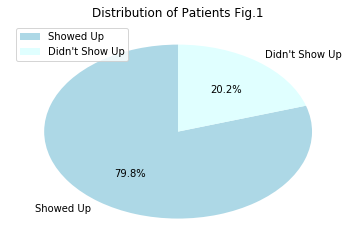

In [19]:
# Plotting The distrubtion of patients
plt.pie(df.Showed_up.value_counts(), labels = ["Showed Up","Didn't Show Up"], colors= ['lightblue','lightcyan'], startangle = 90,autopct='%1.1f%%')
plt.title("Distribution of Patients Fig.1")
plt.legend();


As can be seen from the pie chart above (fig.1) approximately 80% of the patients showed up for their scheduled appointments. To analyse what characteristics these patients have in common, a new dataset that contains only the data of the patient who showed up is created.

In [20]:
# Creating a dataset with only the data of patients who showed up
Showedup_df = df[df['Showed_up'] == 'Yes']
Showedup_df.shape

(88208, 17)

##### Age

To see if the age of the patient influences the outcome; the proportions of patients who showed up for each age group are calculated and plotted below. the choice to compare proportions and not numbers was based on the fact that each age is not equally represented in the dataset; therefore, using proportions can give more accurate results.

In [21]:
# Defining a function to calculate proportions
def calculate_prop(x):
    showed = Showedup_df[x].value_counts()
    total = df[x].value_counts()
    proportion = showed/total
    return proportion

In [22]:
# Calculating the proportion of patient who showed up for each age group
proportion_age = calculate_prop('Age_groups')
proportion_age

0-18      0.774628
19-37     0.764632
38-55     0.804690
56-115    0.843550
Name: Age_groups, dtype: float64

In [23]:
# Reindexing the proportion_age to fix the order of the bin
proportion_age.index = pd.CategoricalIndex(proportion_age.index, ordered=True, categories=bins_names)
proportion_age = proportion_age.sort_index()

#checking that it worked
proportion_age

0-18      0.774628
19-37     0.764632
38-55     0.804690
56-115    0.843550
Name: Age_groups, dtype: float64

In [24]:
# Setting the x locations for the groups
ind = np.arange(len(proportion_age))

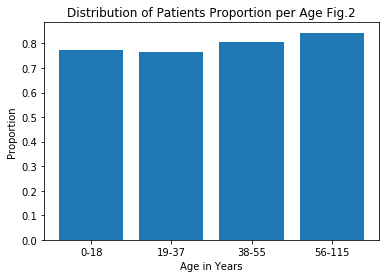

In [25]:
# Plotting The distrubtion of patients Proportion per age
plt.bar(ind, proportion_age, tick_label = bins_names )
# Setting all parameters
plt.ylabel('Proportion')
plt.xlabel('Age in Years')
plt.title("Distribution of Patients Proportion per Age Fig.2")
plt.show();

In Fig.2, the proportion for the age group over 56 is the highest, and the age groups 19-37 and 0-18 are the lowest. This could mean that patients in this age group are in greater need of medical assistance; hence tend to show up for their appointment more than others. This may indicate a correlation between age and the tendency of the patients to show up.

##### Neighbourhood

The data is gathered from hospitals that are located in different neighbourhoods. To answer the question of whether the location of the neighbourhood affects the final showing-up rate; the proportions of patients who showed up in each neighbourhood are calculated and plotted below. Again, the choice to compare proportion and not numbers was based on the fact that not every neighbourhood is equally represented in the dataset.

In [26]:
# Calculating the Patient Proportion per neighbourhood
proportion_neigh = calculate_prop('Neighbourhood')

In [27]:
# Setting the x locations for the groups
ind = np.arange(len(proportion_neigh))

# Creating labels for the x-axis
neighbourhood_name= proportion_neigh.index.tolist()

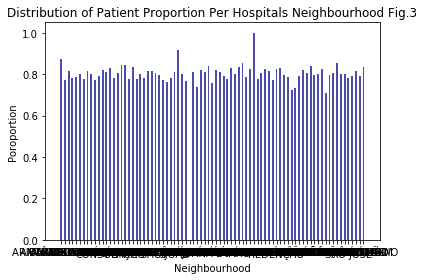

In [28]:
# Plotting The distrubtion of patients Proportion per neighbourhood
plt.bar(ind, proportion_neigh ,width= 0.5, color='Darkblue', alpha=0.7, tick_label = neighbourhood_name )
# Setting all parameters
plt.ylabel('Poroportion')
plt.xlabel('Neighbourhood')
plt.title("Distribution of Patient Proportion Per Hospitals Neighbourhood Fig.3")
plt.show();

In [29]:
# Calculating the mean
proportion_neigh.mean()

0.8045054853106903

In [30]:
# Identifying neighbourhood with high patient proportion
high_prop_neigh= proportion_neigh[proportion_neigh > 0.87]

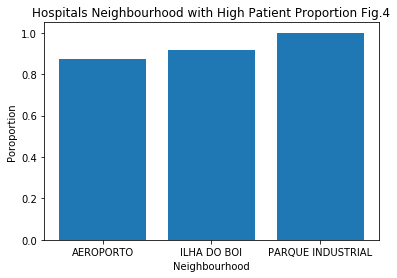

In [31]:
# Setting the x locations for the groups
ind = np.arange(len(high_prop_neigh))
# Creating labels for the x-axis
neighbourhood_name= high_prop_neigh.index.tolist()

# Plotting The distrubtion of patients Proportion per neighbourhood
plt.bar(ind, high_prop_neigh, tick_label = neighbourhood_name )
# Setting all parameters
plt.ylabel('Poroportion')
plt.xlabel('Neighbourhood')
plt.title("Hospitals Neighbourhood with High Patient Proportion Fig.4")
plt.show();

As can be seen from Fig.3; most proportions are very close to the mean showing no evident correlation between the location of the hospital and the tendency of the patients to show up. Although three nighbourhoods(Fig.4), namely *Aeroporto*, *Ilha do boi* and *Parque industrial* have patient proportions that are greater than the mean, based on the data available it's hard to reach a clear explanation for these values.

##### Month

To determine, whether the month in which the appointment was scheduled affects the tendency of the patients to show up; the proportions of patients who showed up in each month are calculated and plotted below.

In [32]:
# Calculating the proportion of patients showing up for appointment each month
proportion_month = calculate_prop('Appointment_month')

In [33]:
# Setting the x locations for the groups
ind = np.arange(len(proportion_month))

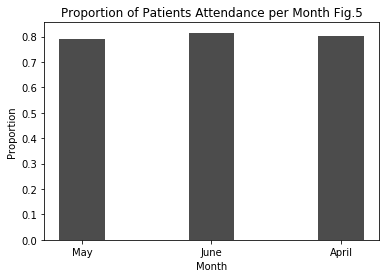

In [34]:
# Plotting The distrubtion of patients Proportion per month
plt.bar(ind, proportion_month, width= 0.35, color='k', alpha=0.7)

# Setting all parameters

plt.ylabel('Proportion')
plt.xlabel('Month')
plt.title("Proportion of Patients Attendance per Month Fig.5")
locations = ind  # xtick locations
labels = ['May','June', 'April']  # xtick labels
plt.xticks(locations, labels);

As can be seen from Fig.5; all appointments from the dataset were scheduled in only 3 months, namely April, May, and June. The proportions among these months are very close to each other showing no evident correlation between the month and the tendency of the patients to show up.

##### Day

To determine, whether the day of the week on which the appointment was scheduled affects the tendency of the patients to show up; the proportions of patients who showed up on each day are calculated and plotted below.

In [35]:
# Calculating the proportion of patients showing up for appointment each day
day_proportion = calculate_prop('Appointment_day')

In [36]:
# Setting the x locations for the groups
ind = np.arange(len(day_proportion))

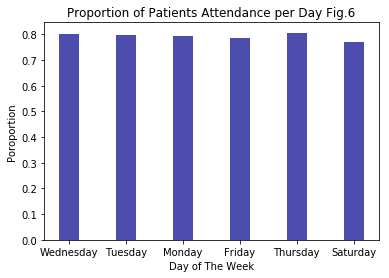

In [37]:
# Plotting The distrubtion of patients Proportion per day
showedup_bars = plt.bar(ind, day_proportion, width = 0.35, color='Darkblue', alpha=0.7)

# Setting all parameters
plt.ylabel('Poroportion')
plt.xlabel('Day of The Week')
plt.title('Proportion of Patients Attendance per Day Fig.6')
locations = ind   # xtick locations
labels = ['Wednesday','Tuesday', 'Monday','Friday','Thursday','Saturday']  # xtick labels
plt.xticks(locations, labels);

In [38]:
# Calculating the mean
day_proportion.mean()

0.7931881860163589

In [39]:
# Identify days with proportion lower than the mean
day_proportion[day_proportion <0.79]

Friday      0.787739
Saturday    0.769231
Name: Appointment_day, dtype: float64

In Fig.6, The proportions among most days of the week(no data were given for Sundays) are very close to each other. Only Saturday and Friday have proportions that are slightly lower than the mean. People usually go out to meet their friends and families on Friday nights and during the weekends; this may explain the lower value associated with both days. However; other confounding factors could be responsible for the variation in the values. 

##### Gender

To learn if gender plays a role in the tendency of the patient to show up, the proportions of both female and male patients who showed up are calculated and plotted below.

In [40]:
# Calculation the number of both female and male patients
total_gender = df.Gender.value_counts()


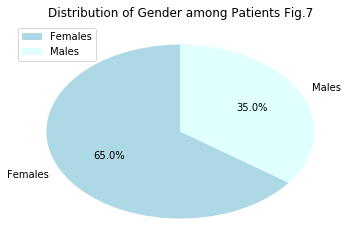

In [41]:
# Plotting the gender distribution among patient
plt.pie(total_gender, labels= ['Females', 'Males'], colors= ['lightblue','lightcyan']  ,startangle = 90, autopct='%1.1f%%')
plt.title("Distribution of Gender among Patients Fig.7")
plt.legend();

Fig.7 shows that 65% of patients who scheduled an appointment were females; this may indicate that females in general are more attentive to their health than males.

In [42]:
# Calculating the proportions of both female and male patients who showed up
proportion_gender = calculate_prop('Gender')

In [43]:
# Setting the x locations for the groups
ind = np.arange(len(proportion_gender))

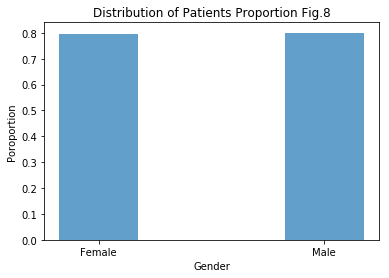

In [44]:
# Plotting The distrubtion of patients Proportion per day
plt.bar(ind, proportion_gender ,  width = 0.35, alpha=0.7)

# Setting all parameters
plt.ylabel('Poroportion')
plt.xlabel('Gender')
plt.title("Distribution of Patients Proportion Fig.8")
locations = ind
labels=["Female","Male"]
plt.xticks(locations, labels)
plt.legend();
plt.show()

From Fig.8, it can be seen that both genders have approximately similar proportions; therefore, showing no clear correlation between gender and the tendency of the patients to show up.

##### Other Factors

To study the influence of other factors such as suffering from chronic diseases, being handicapped, being a member of the Bolsa Família welfare program, or receiving a reminder SMS; the same approach used previously is followed.

In [45]:
# Identfying all other factors to be considered
variables_names =['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism','SMS_received', 'Handcap']  


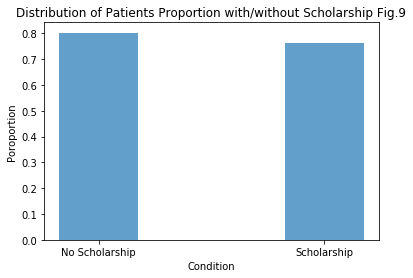

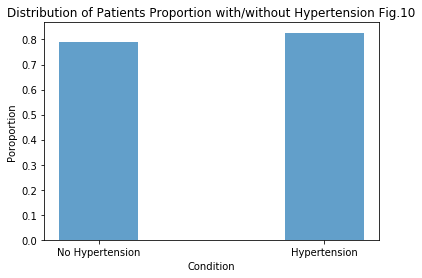

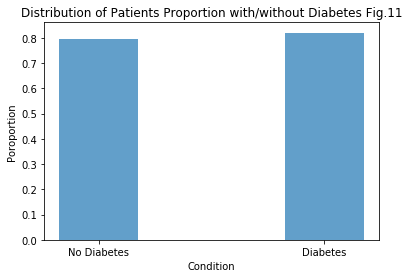

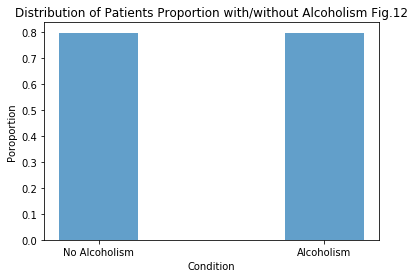

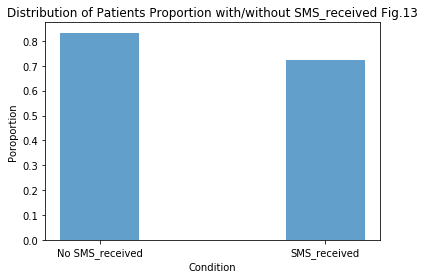

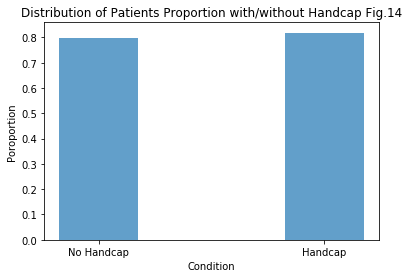

In [46]:
# Creating the plots
i = 0
x = 9
for n in variables_names:
    
    proportion= calculate_prop(n)
    ind = np.arange(len(proportion))
    label_1= 'No'+' '+ str(variables_names[i])
    label_2 = str(variables_names[i])
    plt.bar(ind, proportion,  width = 0.35, alpha=0.7)
    plt.ylabel('Poroportion')
    plt.xlabel('Condition')
    plt.title("Distribution of Patients Proportion with/without {} Fig.{}".format(label_2, x))
    locations = ind
    labels=[label_1,label_2]
    plt.xticks(locations, labels)
    plt.legend();
    plt.show()
    i+=1
    x+=1

In Fig.9, the proportion of patients who are a member of the [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) welfare program is lower than those who aren't. The difference is minor to suggest a correlation; however, it's still an interesting observation.

In fig.10, 11, and 14, the proportions for patients who suffer from a chronic disease (hypertension and diabetes) or dealing with a handicap are greater than those who aren't. Again the difference is minor for a correlation to be concluded. This difference could suggest that these patients may need regular medical check-ups because of their conditions.

In Fig.12, both alcoholic and non-alcoholic patients have similar proportions showing no clear correlation between alcoholism and the tendency of the patients to show up.

In Fig.13, the proportion of patients who didn't receive a reminder SMS is greater than those who did. This is also an interesting observation as it shows that receiving a reminder SMS does not encourage the patients to show up.


### What percentage of patients have co-existing hypertension and diabetes? What percentage of those patients showed up?

A 2D histogram of patients suffering from hypertension and those suffering from diabetes is created to understand the frequency of the two conditions co-existing among the patients in the dataset.

In [47]:
# sertting x and y axis
x= df['Hypertension']
y= df['Diabetes']

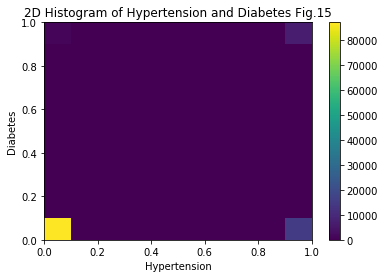

In [48]:
# ploting a 2d histogram of Hypertension and Diabetes
plt.hist2d(x,y)
plt.ylabel('Diabetes')
plt.xlabel('Hypertension')
plt.title("2D Histogram of Hypertension and Diabetes Fig.15")
plt.margins(0)
plt.colorbar()
plt.show()

It's clear from Fig.15 that only a small number of patients have both conditions.  The number of patients who suffer from hypertension alone is greater than that of patients suffering from diabetes alone.

To calculate the percentage of patients who have co-existing hypertension and diabetes;  two dataframes are created. One contains all patients suffering from diabetes and the other those who suffer from hypertension. Afterward, The two dataframes are merged using the inner join method which uses the intersection of keys from both frames.

In [49]:
# Creating dataframe for all patients suffering from hypertension
hyper_df = df[df['Hypertension']== 1]

# Creating dataframe for all patients suffering from diabetes
diabet_df= df[df['Diabetes']== 1]

# Merging the two dataframes
df_combined= hyper_df.merge(diabet_df, how= 'inner')

#checking that it worked
df_combined.Diabetes.value_counts()

1    6572
Name: Diabetes, dtype: int64

In [50]:
# calculating the Percentage of patients with co-existing conditions
percentage_total= (df_combined.shape[0]/df.shape[0])*100
percentage_total

5.946058429162105

 Approximately 6% of all patients have co-existing hypertension and diabetes. 

In [51]:
# Filtering dataframe to obtain data for only patient who showed up
combined_showedup = df_combined.query('Showed_up == "Yes"')

# Calculating the percentage of patients with co-existing conditions who showed up
percentage_showedup = (combined_showedup.Hypertension.value_counts()/df_combined.Hypertension.value_counts())*100
percentage_showedup

1    82.395009
Name: Hypertension, dtype: float64

80% of patients who have co-existing hypertension and diabetes showed up for their appointment. This result is consistence with previous observations that patients with chronic conditions are likely to show up for their appointments.

### Does being a member of the Brazilian welfare program influenced by age?

To see if there is a correlation between being a member of the program and the age of the patient, a scatter plot is created.

In [52]:
# sertting x and y axis
x= df['Age']
y= df['Scholarship']

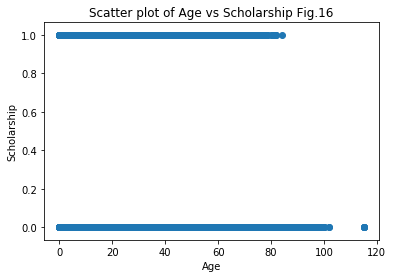

In [53]:
# Creating the scatter plot
plt.scatter(x,y)
plt.ylabel('Scholarship')
plt.xlabel('Age')
plt.title("Scatter plot of Age vs Scholarship Fig.16")
plt.show();

Fig.16 shows no correlation between age and being a member of the welfare program. 

### Does the time interval between the scheduling day and appointment day affect the patient's likelihood of showing up?

To determine, if the time interval between the scheduling day and appointment day can influence the tendency of the patient to show up; the mean time interval for both patients who showed up and those who didn't are calculated and plotted below. 

In [54]:
# Calculating the time interval between the scheduling day and the day of the actual appointment
df['time_interval']= df['AppointmentDay'].dt.date-df['ScheduledDay'].dt.date

In [55]:
#Calculting the mean time interval for the appointment for which patient showed up 
showedup_mean= df.query('Showed_up =="Yes"')['time_interval'].mean().days

In [56]:
#Calculting the mean time interval for the appointmentfor which patient didn't showed up 
missed_appointment_mean = df.query('Showed_up =="No"')['time_interval'].mean().days

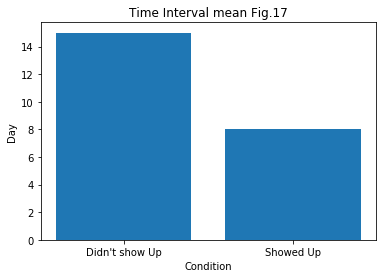

In [57]:
# Ploting the data
plt.bar(["Showed Up","Didn't show Up"],[showedup_mean,missed_appointment_mean])
plt.title("Time Interval mean Fig.17")
plt.xlabel("Condition")
plt.ylabel("Day");

In Fig.17, the mean of the time interval for patients who didn't show up for their appointments is longer than that of the patients who did by 7 days. This may suggest a correlation between the length of time interval and the tendency of the patient to show up.

### When it comes to appointments, how does the day of the week affect their number?

In [58]:
# Calculate the number of appointment for each day
appointment_count = df.Appointment_day.value_counts()
day_names = appointment_count.index.tolist()
day_names.sort()

In [59]:
# Setting the x locations for the groups
ind = np.arange(0,7)
# Setting labels
labels = ['Wednesday', 'Tuesday', 'Monday', 'Friday', 'Thursday', 'Saturday']

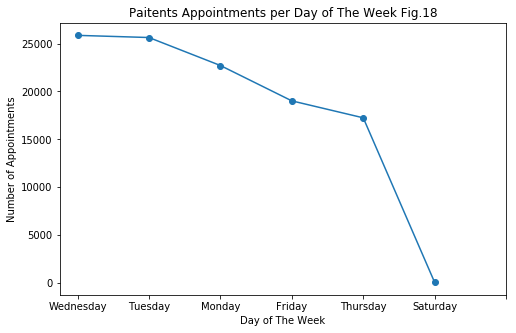

In [60]:
# ploting the data
plt.figure(figsize = [8,5])
plt.plot(day_names, appointment_count, marker= 'o')
plt.xticks(ind,labels)
plt.title('Paitents Appointments per Day of The Week Fig.18')
plt.xlabel('Day of The Week')
plt.ylabel('Number of Appointments')
plt.show()

As can be seen in Fig.18, Saturday is the day with the least number of booked appointments. The plot shows a preference for the patients to book their appointments on weekdays- especially, Wednesday and Tuesday- instead of weekends. This preference aligns with the observation in Fig.6 in which patients showed a higher tendency to miss their appointments on Saturdays. 

Another factor why Saturdays can have fewer appointments might have to do with the working hours on this day. Maybe some hospitals work half-days on Saturdays; therefore, the number of appointments available for booking is less than on other weekdays.

<a id='conclusions'></a>
## Conclusions

The purpose of this report is to examine a dataset of 100,000 medical appointments in Brazil to answer the following questions:

1. **What factors can influence a patient's willingness to attend?**
2. **What percentage of patients have co-existing hypertension and diabetes? What percentage of those patients showed up?**
3. **Does being a member of the Brazilian welfare program influenced by age?**
4. **Does the time interval between the scheduling day and appointment day affect the patient's likelihood of showing up?**
5. **When it comes to appointments, how does the day of the week affect their number?**

The dataset has the following general statistics

- 80% of patients showed up for their appointment.
- 65% of patients who scheduled an appointment were females
- Patients have an average age of 37 years of age.
- The majority of patients weren’t members of the Bolsa Familia welfare program.
- Most patients didn’t suffer from chronic conditions.
- Approximately 6% of all patients have co-existing hypertension and diabetes. 

Following a series of analyses to answer the first question, the following conclusions were drawn:

- Compared to other age groups, patients 56 and over are more likely to show up for appointments. 
- There is a greater tendency for patients to attend appointments in hospitals located in Aeroporto, Ilha do Boi, and Parque industrial neighbourhoods.
- In terms of showing up for appointments, the month in which the appointment was scheduled did not affect the patients' tendency to do so.
- There was a lower attendance rate on Saturdays and Fridays compared to other days of the week.
- A similar attendance rate was observed in both males and females, showing no clear correlation between gender and attendance.
- Bolsa Familia members have a lower showing-up rate than those who do not belong to the program.
- Patients who suffer from a chronic disease (hypertension and diabetes) or dealing with a handicap were more likely to show up for their appointment than other patients.
- There was no correlation between alcoholism and attendance rate.
- Receiving a reminder SMS does not motivate the patients to show up for the appointment.

The analysis made to answer the second question revealed the following statistics
- Approximately, 6% of all patients have co-existing hypertension and diabetes. 
- Approximately, 80% of patients who have co-existing hypertension and diabetes showed up for their appointment. 

A scatter plot was created to answer the third question, the plot showed no correlation. For the fourth question, the average waiting time between the scheduling day and appointment day was calculated for patients who attended their appointment and also for those who didn’t. Upon comparison; it was found that the average waiting time for patients who didn't show up for their appointments was longer than that of the patients who did by 7 days, which may suggest a correlation between the length of the waiting time interval and the tendency of the patient to show up.

Finally, for the last question, the number of appointments on each day of the week was examined; the analysis showed a patient preference to schedule appointments on weekdays- especially, Wednesday and Tuesday- instead of Saturdays.

## Limitations

- In the age column, 3539 rows have an age value of zero, the assumption has been made that those values represent infants. Hence the values were not replaced. 
- To simplify the analysis, the number of handicaps a person suffers from was not taken into consideration.
- Some groups are underrepresented in the dataset; for example, elder patients with age over 100 years. Only 8% of patients have diabetes, whereas only 3% struggle with alcohol addiction. The Parque industrial neighbourhood is only represented by one patient.
- Appointment time data was missing which could’ve been useful to learn if there is a trend in preference among patients for certain times of the day.
- All the conclusions made based on the analysis are not immune to inaccuracy due to the existence of other confounding factors such as the socioeconomic status of the patients and the presence of a support network that encourages the patient to follow up with treatments.


# Reference

1. https://stackoverflow.com/questions/25646200/python-convert-timedelta-to-int-in-a-dataframe
2. https://stackoverflow.com/questions/43005462/pandas-bar-plot-with-binned-range
3. https://stackoverflow.com/questions/62689699/how-to-manually-arrange-index-of-value-counts-in-python
4. https://stackoverflow.com/questions/73159591/in-my-code-why-doesnt-my-list-sort-from-the-earliest-to-the-latest-in-dates
5. https://www.includehelp.com/python/pandas-convert-month-int-to-month-name.aspx
6. https://stackoverflow.com/questions/72507589/how-to-create-and-fill-a-new-column-based-on-conditions-in-two-other-columns


In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0